In [1]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

## Re-sampling the data
We import the training and testing data from the given files and store them in their respective variables and then split the training data into 16 equal parts.

In [2]:
#importing the train data
with open('data/train.pkl', 'rb') as f:
    train_data = pickle.load(f)

In [3]:
#importing the test data
with open('data/test.pkl', 'rb') as f:
    test_data = pickle.load(f)

In [4]:
np.random.shuffle(train_data)

In [5]:
x = train_data[:,:-1]
y = train_data[:,1]

In [6]:
x_test = test_data[:,0]
y_test = test_data[:,1]

In [7]:
x_test = x_test.reshape(-1, 1)

In [8]:
x_train=np.array((np.array_split(x, 16)), dtype=object)
y_train=np.array((np.array_split(y, 16)), dtype=object)

Training and testing data:

In [9]:
print("x_train: ")
print(x_train)

print("y_train: ")
print(y_train)

print("x_test: ")
print(x_test)

print("y_test: ")
print(y_test)

x_train: 
[[[10.831294093602303]
  [34.06662687471541]
  [0.5435252309655737]
  ...
  [25.969876573762882]
  [16.851701740372118]
  [-23.98977060411686]]

 [[14.597324362523604]
  [4.591197802272775]
  [-6.972331471973244]
  ...
  [22.99546538461068]
  [31.160507511710883]
  [28.070158789382937]]

 [[8.184936181098822]
  [21.018772901056934]
  [-11.105637930460029]
  ...
  [32.78873544299449]
  [25.9775738212244]
  [25.62691137952298]]

 ...

 [[-12.004021267987465]
  [30.684518215723113]
  [-24.33140296994515]
  ...
  [6.783266454726451]
  [6.854674549137173]
  [-33.88034029893865]]

 [[21.15953006763629]
  [-2.13991497053341]
  [27.85446027303588]
  ...
  [-15.628456004212355]
  [2.053607240700528]
  [8.080463681229984]]

 [[25.901072630723757]
  [24.786664960167236]
  [-7.412149908501984]
  ...
  [32.16758124203905]
  [-18.155507105601714]
  [21.01989095036356]]]
y_train: 
[[-2901.907139974186 6590.994183263176 5459.019095111517 ...
  3736.9647415838635 224.70198390995134 -790.46905

In [10]:
print("Number of test data:",len(test_data))
print("Number of train data:",len(train_data))

Number of test data: 80
Number of train data: 8000


## Calculating Bias and Variance
We calculate the bias, variance and the irreducible error of the training data using the test set. We train a linear classifier on each of the 16 train sets separately and repeat the process for all polynomial functions from degree 1 to 15.

In [11]:
bias=np.zeros((15))
bias_sq=np.zeros((15))
variance=np.zeros((15))
irr_error=np.zeros((15))

degree = 1


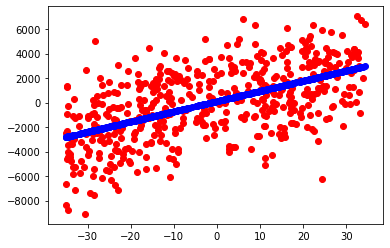

degree = 2


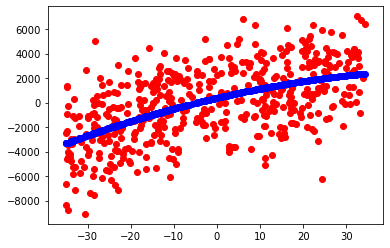

degree = 3


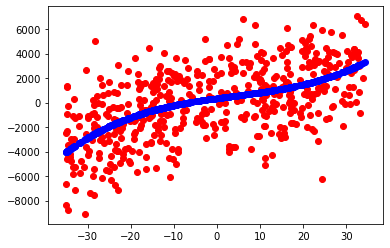

degree = 4


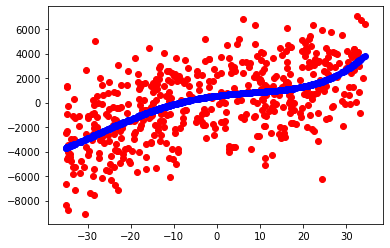

degree = 5


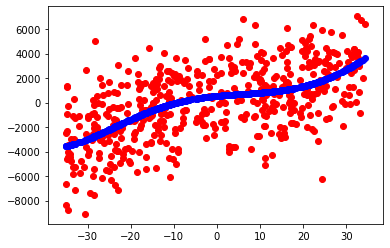

degree = 6


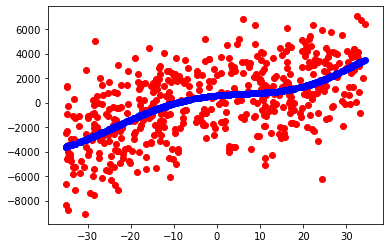

degree = 7


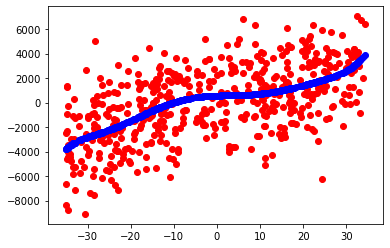

degree = 8


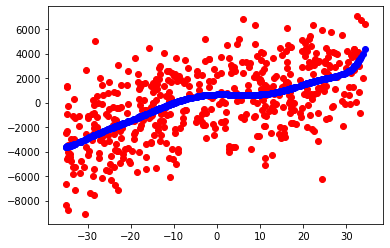

degree = 9


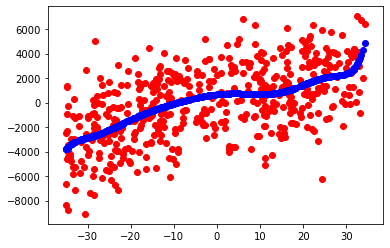

degree = 10


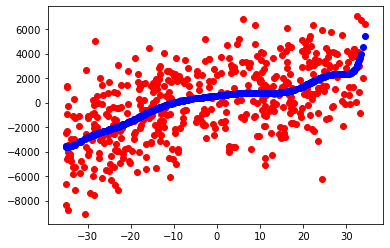

degree = 11


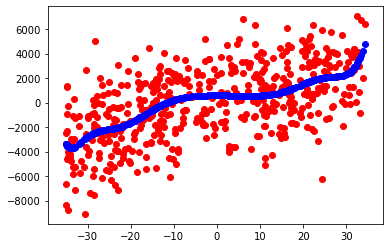

degree = 12


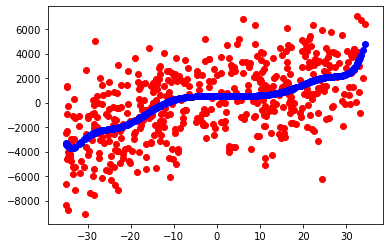

degree = 13


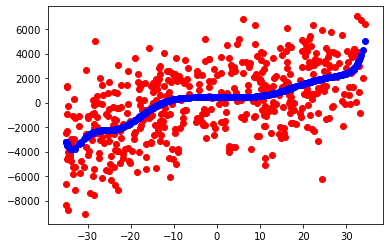

degree = 14


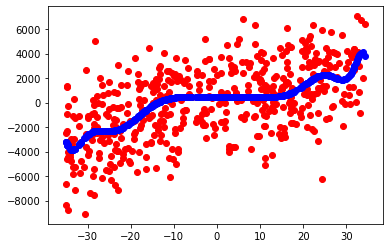

degree = 15


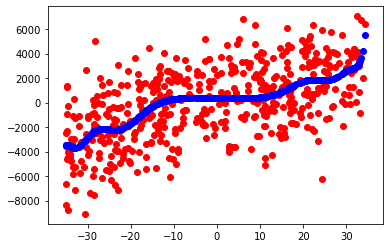

In [12]:
for degree in range (1,16):
    exp_y=np.zeros((16,80))
    print("degree =",degree)
    
    #Training the model for each training set for each degree
    for i in range (16):   
        polynomial = PolynomialFeatures(degree=degree, include_bias=False)

        #Fitting and transforming the polynomial as required
        x_values = polynomial.fit_transform(x_train[i])
        fit_x_test = polynomial.fit_transform(x_test)

        #Train the model for each training set
        l_reg = LinearRegression()
        l_reg.fit(x_values, y_train[i])
        exp_y[i] = l_reg.predict(fit_x_test)
        
        #Printing the graph for training set 16 for each polynomial         
        if (i==15):            
            plt.scatter(x_train[i], y_train[i], color = 'red')
            plt.scatter(x_train[i], l_reg.predict(x_values), color = 'blue')
            plt.show()

    #calculating bias
    point_mean=np.mean(exp_y,axis=0)
    bias_sq[degree-1]=np.mean((point_mean-y_test)**2)
    bias[degree-1]=np.sqrt(bias_sq[degree-1])

    #calculating variance
    point_var = np.var(exp_y,axis=0)
    variance[degree-1]=np.mean(point_var)
    
    #calculating irreducible error
    msq_error = np.mean((y_test - exp_y) ** 2 )
    irr_error[degree-1]=msq_error - bias_sq[degree-1] - variance[degree-1]

### Tabulating the values for Bias, Variance and Irreducible error

In [13]:
table_bias = pd.DataFrame ({'Degree':np.array(range(1,16)),'Bias':bias,'Bias^2':bias_sq,'Variance': variance, 'Irreducible error': irr_error})
print(table_bias.to_string(index=False))

 Degree        Bias         Bias^2       Variance  Irreducible error
      1  700.955412  491338.489804   41491.081386      -1.309672e-10
      2  685.617959  470071.985099   71574.015376      -4.365575e-11
      3   58.922400    3471.849261   72811.925171      -2.910383e-11
      4   59.099148    3492.709256   86932.906844       0.000000e+00
      5   50.755885    2576.159883  123825.607841       1.455192e-11
      6   51.290581    2630.723650  141141.210610       2.910383e-11
      7   70.432639    4960.756690  156012.922089       0.000000e+00
      8   74.725862    5583.954501  199650.650657       2.910383e-11
      9   79.427540    6308.734082  217367.068506       2.910383e-11
     10   74.859285    5603.912623  235104.163625      -2.910383e-11
     11   87.311534    7623.304025  246268.197322       0.000000e+00
     12  109.048290   11891.529601  238755.399160       0.000000e+00
     13   83.995203    7055.194095  261659.199591       0.000000e+00
     14  152.654422   23303.372683

###  Plotting $Bias^2 − Variance$ graph

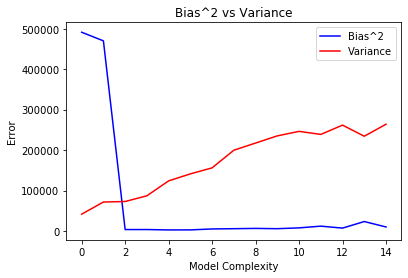

In [14]:
plt.plot(bias_sq,label='Bias^2', color = 'blue')
plt.plot(variance,label='Variance', color = 'red')
plt.xlabel('Model Complexity', fontsize='medium')
plt.ylabel('Error', fontsize='medium')
plt.title("Bias^2 vs Variance")
plt.legend()